<a href="https://colab.research.google.com/github/iiney/colabbb/blob/main/Emotion_based_song_recommender_model_training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div style="background-color: lightgray; padding: 10px;">
    
# **Mood based recommender**
    
</div>

# Data Preparation

In [ ]:
import numpy as np
import pandas as pd
from PIL import Image
from tqdm import tqdm
import os

# convert string to integer
def atoi(s):
    n = 0
    for i in s:
        n = n*10 + ord(i) - ord("0")
    return n

# making folders
outer_names = ['test','train', 'val']
# original = ['angry', 'disgusted', 'fearful', 'happy', 'sad', 'surprised', 'neutral']
inner_names = ['angry', 'happy', 'sad', 'calm']
os.makedirs('data', exist_ok=True)
for outer_name in outer_names:
    os.makedirs(os.path.join('data',outer_name), exist_ok=True)
    for inner_name in inner_names:
        os.makedirs(os.path.join('data',outer_name,inner_name), exist_ok=True)

# to keep count of each category
angry_train = 0
happy_train = 0
sad_train = 0
calm_train = 0
angry_val = 0
happy_val = 0
sad_val = 0
calm_val = 0
angry_test = 0
happy_test = 0
sad_test = 0
calm_test = 0

df = pd.read_csv("fer2013.csv")
mat = np.zeros((48,48),dtype=np.uint8)

In [ ]:
df['Usage'].value_counts()

Usage
Training       28709
PublicTest      3706
PrivateTest     3472
Name: count, dtype: int64

In [ ]:
# read the csv file line by line
for i in tqdm(range(len(df))):
    txt = df['pixels'][i]
    words = txt.split()

    # the image size is 48x48
    for j in range(2304):
        xind = j // 48
        yind = j % 48
        mat[xind][yind] = atoi(words[j])

    img = Image.fromarray(mat)

    # train
    if i <22969 or (i>28710 and i<31583) or (i>32299 and i<35171) : #28709 full dataset
        if df['emotion'][i] == 0:
            img.save('data/train/angry/angry'+str(angry_train)+'.png')
            angry_train += 1
        elif df['emotion'][i] == 3:
            img.save('data/train/happy/happy'+str(happy_train)+'.png')
            happy_train += 1
        elif df['emotion'][i] == 4:
            img.save('data/train/sad/sad'+str(sad_train)+'.png')
            sad_train += 1
        elif df['emotion'][i] == 6:
            img.save('data/train/calm/calm'+str(calm_train)+'.png')
            calm_train+= 1
    # val
    elif (i>22968 and i<25840) or (i>31582 and i<31941) or (i>35170 and i<35529) :
      if df['emotion'][i] == 0:
        img.save('data/val/angry/angry'+str(angry_val)+'.png')
        angry_val += 1
      elif df['emotion'][i] == 3:
        img.save('data/val/happy/happy'+str(happy_val)+'.png')
        happy_val += 1
      elif df['emotion'][i] == 4:
        img.save('data/val/sad/sad'+str(sad_val)+'.png')
        sad_val += 1
      elif df['emotion'][i] == 6:
        img.save('data/val/calm/calm'+str(calm_val)+'.png')
        calm_val += 1

    # test
    else:
        if df['emotion'][i] == 0:
            img.save('data/test/angry/angry'+str(angry_test)+'.png')
            angry_test += 1
        elif df['emotion'][i] == 3:
            img.save('data/test/happy/happy'+str(happy_test)+'.png')
            happy_test += 1
        elif df['emotion'][i] == 4:
            img.save('data/test/sad/sad'+str(sad_test)+'.png')
            sad_test += 1
        elif df['emotion'][i] == 6:
            img.save('data/test/calm/calm'+str(calm_test)+'.png')
            calm_test += 1

print("Done!")

100%|███████████████████████████████████████████████████████████████████████████| 35887/35887 [03:44<00:00, 159.56it/s]

Done!


# EDA

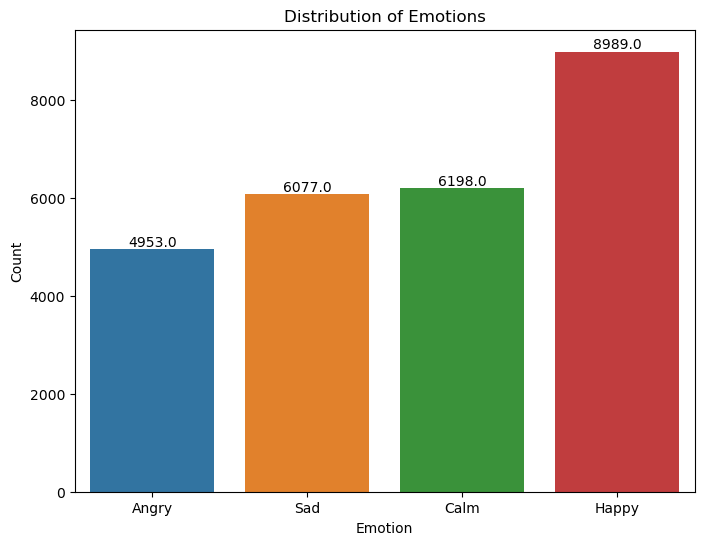

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Mapping numeric labels to emotion labels
emotion_mapping = {0: 'Angry', 3: 'Happy', 4: 'Sad', 6: 'Calm'}
df['emotion_label'] = df['emotion'].map(emotion_mapping)

# Distribution of Emotions
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='emotion_label', data=df)
plt.title('Distribution of Emotions')
plt.xlabel('Emotion')
plt.ylabel('Count')

# Add count labels on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()


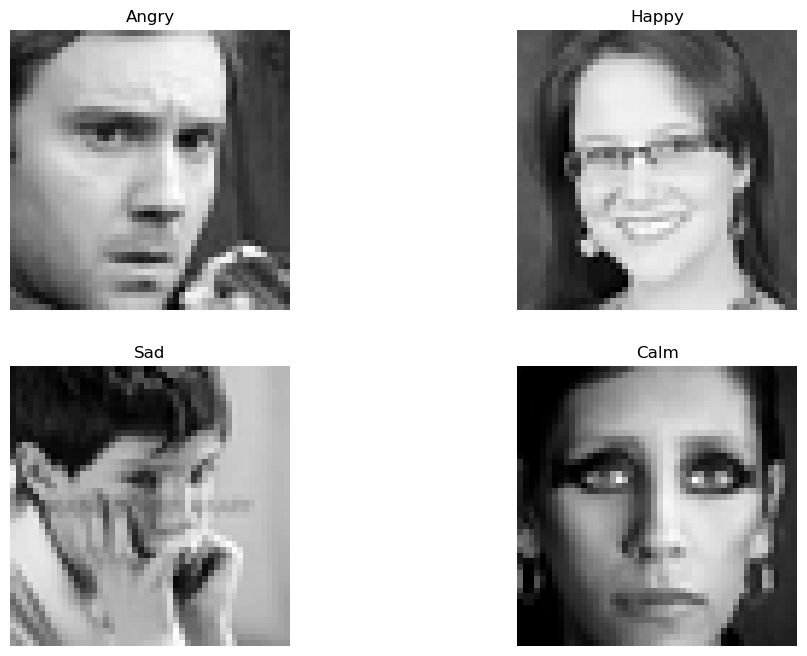

In [ ]:
#new code !!!!!
import matplotlib.pyplot as plt
import numpy as np

# Define the sequence of values for i
sequence = [0, 3, 4, 6] # 0=angry 3=happy 4=sad 6=calm

# Set the size of the entire figure
plt.figure(figsize=(12, 8))

# Loop over the sequence of values for i
for idx, i in enumerate(sequence):
    # Create a subplot in a 2x2 grid at the idx+1 position
    plt.subplot(2, 2, idx + 1)

    # Filter the DataFrame to get the first image of emotion 'i'
    sample_image = df[df['emotion'] == i]['pixels'].iloc[0].split()

    # Convert the pixel values from strings to an array of uint8
    sample_image = np.array(sample_image, dtype=np.uint8).reshape((48, 48))

    # Display the image in grayscale
    plt.imshow(sample_image, cmap='gray')

    # Set the title of the subplot using the emotion mapping
    plt.title(emotion_mapping[i])

    # Remove axis ticks and labels for a cleaner look
    plt.axis('off')

# Render and display the figure
plt.show()

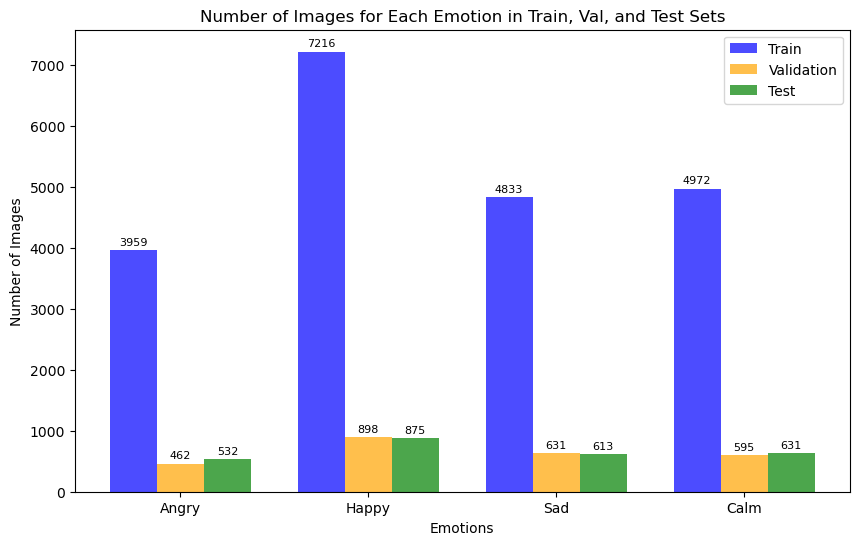

In [ ]:
import matplotlib.pyplot as plt

# Count the number of images for each emotion in train, val, and test sets
train_counts = [angry_train, happy_train, sad_train, calm_train]
val_counts = [angry_val, happy_val, sad_val, calm_val]
test_counts = [angry_test, happy_test, sad_test, calm_test]

emotions = ['Angry', 'Happy', 'Sad', 'Calm']

# Plotting the bar graph
bar_width = 0.25
index = range(len(emotions))

plt.figure(figsize=(10, 6))
bars_train = plt.bar(index, train_counts, width=bar_width, label='Train', color='blue', alpha=0.7)
bars_val = plt.bar([i + bar_width for i in index], val_counts, width=bar_width, label='Validation', color='orange', alpha=0.7)
bars_test = plt.bar([i + 2 * bar_width for i in index], test_counts, width=bar_width, label='Test', color='green', alpha=0.7)

plt.xlabel('Emotions')
plt.ylabel('Number of Images')
plt.title('Number of Images for Each Emotion in Train, Val, and Test Sets')
plt.xticks([i + bar_width for i in index], emotions)
plt.legend()

# Add labels on top of each bar
def add_labels(bars):
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, yval + 50, round(yval), ha='center', va='bottom', fontsize=8)

add_labels(bars_train)
add_labels(bars_val)
add_labels(bars_test)

plt.show()

 Model Training (原本的)

In [ ]:
import numpy as np
import argparse
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
# plots accuracy and loss curves
def plot_model_history(model_history):

    'Plot Accuracy and Loss curves with the model_history'

    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['accuracy'])+1),model_history.history['accuracy'])
    axs[0].plot(range(1,len(model_history.history['val_accuracy'])+1),model_history.history['val_accuracy'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['accuracy'])+1,len(model_history.history['accuracy'])/10))
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1,len(model_history.history['loss'])/10))
    axs[1].legend(['train', 'val'], loc='best')
    fig.savefig('plot.png')
    plt.show()

Model (第二個)

In [ ]:
import pandas as pd
import numpy as np
from keras.datasets import mnist
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import BatchNormalization
from keras import regularizers
# Define data generators
train_dir = 'data/train'
val_dir = 'data/val'
test_dir = 'data/test'



num_train = 21005
num_val = 2622
batch_size = 64
num_epoch = 75

train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(48,48),
        batch_size=batch_size,
        color_mode="grayscale",
        class_mode='categorical')

validation_generator = val_datagen.flow_from_directory(
        val_dir,
        target_size=(48,48),
        batch_size=batch_size,
        color_mode="grayscale",
        class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(48,48),
        batch_size=batch_size,
        color_mode="grayscale",
        class_mode='categorical')

# Create the model
model = Sequential()

num_features = 32
num_labels = 4

model.add(Conv2D(num_features, kernel_size=(3, 3), activation='relu', input_shape=(48,48,1), data_format='channels_last', kernel_regularizer=regularizers.L2(0.01)))
model.add(Conv2D(num_features, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(2*num_features, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(2*num_features, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(2*2*num_features, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(2*2*num_features, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(2*2*2*num_features, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(2*2*2*num_features, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(2*2*2*num_features, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(2*2*num_features, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(2*num_features, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(num_labels, activation='softmax'))


# Train the model
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-7),
              metrics=['accuracy'])
model_info = model.fit(
        train_generator,
        steps_per_epoch=num_train // batch_size,
        epochs=num_epoch,
        validation_data=validation_generator,
        validation_steps=num_val // batch_size)

Found 21017 images belonging to 4 classes.
Found 8728 images belonging to 4 classes.
Found 8940 images belonging to 4 classes.


D:\Anaconda\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/75


D:\Anaconda\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


328/328 ━━━━━━━━━━━━━━━━━━━━ 160s 435ms/step - accuracy: 0.2766 - loss: 1.8122 - val_accuracy: 0.3363 - val_loss: 1.3845
Epoch 2/75
  1/328 ━━━━━━━━━━━━━━━━━━━━ 1:33 286ms/step - accuracy: 0.3281 - loss: 1.3582

D:\Anaconda\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


328/328 ━━━━━━━━━━━━━━━━━━━━ 9s 26ms/step - accuracy: 0.3281 - loss: 0.6812 - val_accuracy: 0.3508 - val_loss: 1.3788
Epoch 3/75
328/328 ━━━━━━━━━━━━━━━━━━━━ 111s 337ms/step - accuracy: 0.3320 - loss: 1.3926 - val_accuracy: 0.3418 - val_loss: 1.3765
Epoch 4/75
328/328 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.4375 - loss: 0.6813 - val_accuracy: 0.3483 - val_loss: 1.2966
Epoch 5/75
328/328 ━━━━━━━━━━━━━━━━━━━━ 114s 345ms/step - accuracy: 0.3406 - loss: 1.3786 - val_accuracy: 0.3445 - val_loss: 1.3750
Epoch 6/75
328/328 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.4375 - loss: 0.6644 - val_accuracy: 0.3426 - val_loss: 1.3719
Epoch 7/75
328/328 ━━━━━━━━━━━━━━━━━━━━ 111s 336ms/step - accuracy: 0.3459 - loss: 1.3711 - val_accuracy: 0.3562 - val_loss: 1.3531
Epoch 8/75
328/328 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.3750 - loss: 0.6780 - val_accuracy: 0.3435 - val_loss: 1.2851
Epoch 9/75
328/328 ━━━━━━━━━━━━━━━━━━━━ 109s 332ms/step - accuracy: 0.3410 - loss: 1.3624 - val_accu

In [ ]:
# Print the model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 46, 46, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 46, 46, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 46, 46, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 23, 23, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 23, 23, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 23, 23, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 23, 23, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 23, 23, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 23, 23, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 11, 11, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 11, 11, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 11, 11, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 11, 11, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 11, 11, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 11, 11, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 5, 5, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 5, 5, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 5, 5, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 5, 5, 256)           │           1,0

 Total params: 4,433,902 (16.91 MB)

 Trainable params: 1,477,348 (5.64 MB)

 Non-trainable params: 1,856 (7.25 KB)

 Optimizer params: 2,954,698 (11.27 MB)

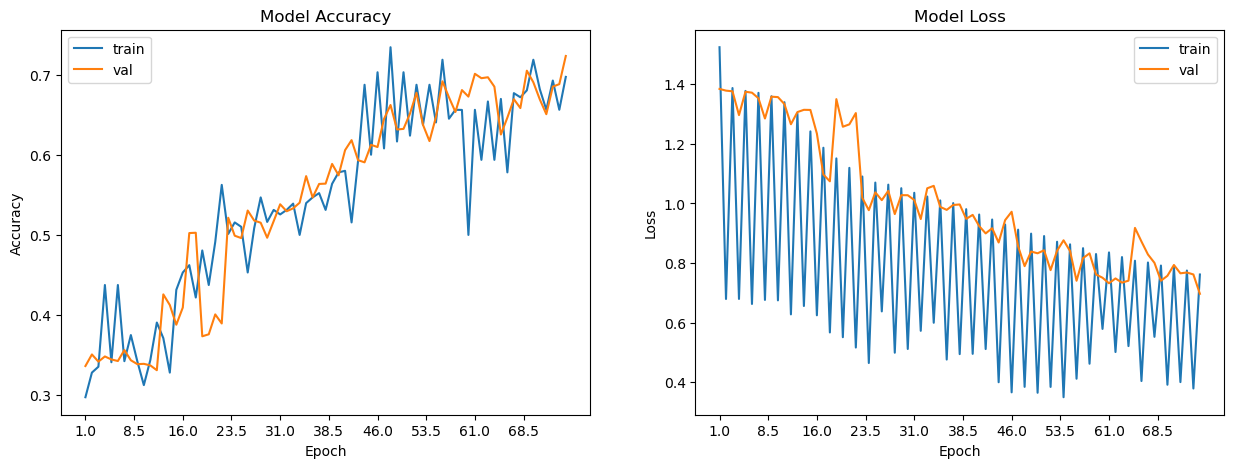

In [ ]:
plot_model_history(model_info)

In [ ]:
# Evaluate the model on the test dataset
eval_result = model.evaluate(test_generator, steps=len(test_generator))

# Print the evaluation result
print("Test Loss:", eval_result[0])
print("Test Accuracy:", eval_result[1])

140/140 ━━━━━━━━━━━━━━━━━━━━ 38s 275ms/step - accuracy: 0.6880 - loss: 0.7815
Test Loss: 0.7839915752410889
Test Accuracy: 0.6843400597572327


In [ ]:
model.save_weights('model_4_training.weights.h5')
model.save('model_new_4_training.weights.h5')

#emotion detection

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


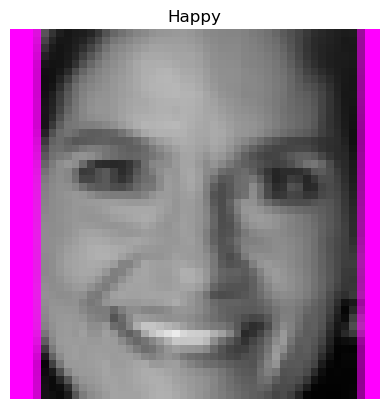

predicted output: ['Happy']
原圖


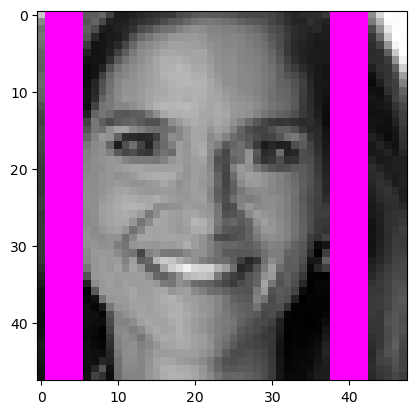

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
# os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

# mode = "display"

# Create the model
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48,48,1)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4, activation='softmax'))


def emotion_recog(frame):
    model.load_weights('model_training.weights.h5')
    emotions = []

    # prevents openCL usage and unnecessary logging messages
    cv2.ocl.setUseOpenCL(False)

    # dictionary which assigns each label an emotion (alphabetical order)
    emotion_dict = {0: "Angry", 1:"Happy", 2:"Sad", 3: "Calm"}

    # frame = cv2.imread("image1.jpg")
    facecasc = cv2.CascadeClassifier('haarcascade_frontalface_default.xml') # for jupyter
    facecasc = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml') # for colab
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = facecasc.detectMultiScale(gray,scaleFactor=1.3, minNeighbors=5)

    for (x, y, w, h) in faces:
        cv2.rectangle(frame, (x, y-50), (x+w, y+h+10), (255, 0, 255), 3)
        roi_gray = gray[y:y + h, x:x + w]
        cropped_img = np.expand_dims(np.expand_dims(cv2.resize(roi_gray, (48, 48)), -1), 0)
        prediction = model.predict(cropped_img)
        maxindex = int(np.argmax(prediction))
        emotion_label = emotion_dict[maxindex]
        cv2.putText(frame, emotion_label[maxindex], (x+20, y-60), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        emotions.append(emotion_label)

        plt.figure()
        plt.imshow(cv2.cvtColor(cv2.resize(frame[y:y + h, x:x + w], (48, 48)), cv2.COLOR_BGR2RGB))
        plt.title(emotion_label)
        plt.axis('off')
        plt.show()

    #display_image(frame)
    return frame,emotions

def display_image(image):
    """Display an image using matplotlib."""
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image_rgb)
    plt.axis('on')

    plt.show()

#從文件系統讀取圖像
input_image = cv2.imread('test.png')

# 執行情緒識別
output_image, predicted_emotions = emotion_recog(input_image)
#emotion_recog(input_image)
print("predicted output:",predicted_emotions)
final_emotion = predicted_emotions

# 顯示結果
print("原圖")
display_image(output_image)



